## Exploring and Processing Data - I

In [1]:
# import packages
import pandas as pd
import numpy as np
import os

## Import Data

In [12]:
raw_data_path = os.path.join(os.path.abspath('..'),'data','raw')
train_file_path = os.path.join(raw_data_path,'train.csv')
test_file_path = os.path.join(raw_data_path,'test.csv')

In [15]:
# import csv in pandas dataframe, index_col indicates primary key of dataset
train_df = pd.read_csv(train_file_path,index_col="PassengerId")
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [18]:
# type(train_df)
# train_df.info()
# test_df.info()

# Add new column 'Survived' to test df with default value of -888
test_df['Survived'] = -888

In [25]:
# dataframes need to be passed as a tuple to concat function
# axis = 0 indicates merge horizontally , axis=1 indicates vertical
df = pd.concat((train_df, test_df), axis=0, sort='False')

## Basic Structure

In [29]:
df.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
8,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,3,male,3,0,349909
9,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,3,female,0,1,347742


In [33]:
df[['Name', 'Age']].head(5)

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


In [47]:
male_passengers = df.loc[df['Sex'] == 'male',]
male_first_passengers = df.loc[((df.Sex == 'male') & (df.Pclass == 1)), ]
print("Number of Male Passangers: {0}".format(len(male_passengers)))
print("Number of First Class Male Passangers: {0}".format(len(male_first_passengers)))

Number of Male Passangers: 843
Number of First Class Male Passangers: 179


## Summary Statistics

In [49]:
# Use describe function to get statistics for all numeric columns
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [50]:
df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [51]:
df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [53]:
%matplotlib inline

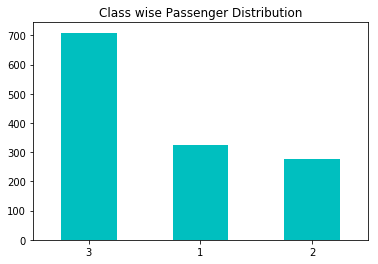

In [55]:
df.Pclass.value_counts().plot(kind='bar', color = 'c', rot = 0, title = 'Class wise Passenger Distribution');

## Distributions

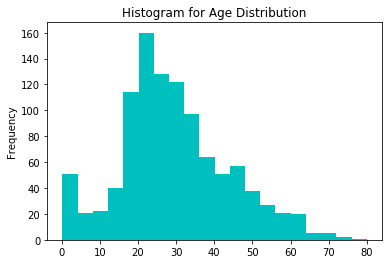

In [61]:
df.Age.plot(kind='hist', color='c', title = 'Histogram for Age Distribution', bins=20)

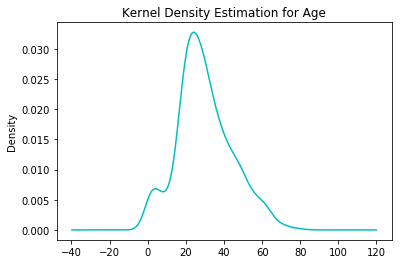

In [60]:
df.Age.plot(kind='kde', color='c', title='Kernel Density Estimation for Age');

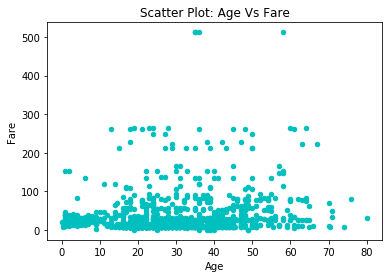

In [62]:
df.plot.scatter(x='Age', y='Fare', color='c', title='Scatter Plot: Age Vs Fare')

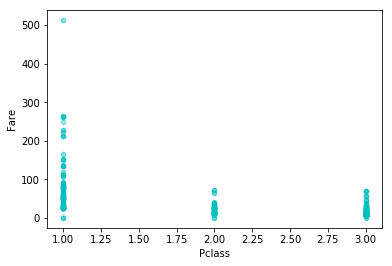

In [63]:
df.plot.scatter(x='Pclass', y='Fare', color='c', alpha=0.15)

## Grouping & Aggregations

In [66]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [67]:
df.groupby('Pclass')['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


## Crosstabs and Pivot Tables

In [69]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


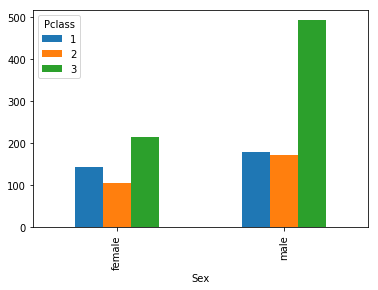

In [71]:
pd.crosstab(df.Sex, df.Pclass).plot(kind='bar');

In [72]:
df.pivot_table(index='Sex', columns = 'Pclass', values='Age', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264
